In [2]:
import numpy as np
import pandas as pd
from ape import accounts, chain, Contract, networks, project

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# USDC/WETH 5bps pool, 8h candles
FILEPATH = "data/price_0x88e6A0c2dDD26FEEb64F039a2c41296FcB3f5640_12509859_17765859_2400.csv"

In [18]:
# TODO: pull from contract
X_DECIMALS = 6
Y_DECIMALS = 18

In [6]:
df = pd.read_csv(FILEPATH)
df

,block_number,sqrt_price_x96
0,12509859,1488666029357725662978369934166891
1,12512259,1498758880028447235204616864140268
2,12514659,1527428496431482073729729059235451
3,12517059,1480447266659661332123963148536664
4,12519459,1510557878125983516937970465170106
...,...,...
2185,17753859,1829209344494308734880463990390144
2186,17756259,1830429610097533257794674119254826
2187,17758659,1827296619717806012513766568630551
2188,17761059,1831453713649288095012480151677960


In [10]:
# calculate prices for both y/x and x/y in case of "weird" token0, token1 ordering
def price(sqrt_price_x96) -> int:
    return (int(sqrt_price_x96) >> 96) ** 2

In [14]:
df['y/x'] = df['sqrt_price_x96'].apply(price)

In [22]:
df['x/y'] = 10 ** Y_DECIMALS // df['y/x']

In [23]:
df

,block_number,sqrt_price_x96,y/x,x/y
0,12509859,1488666029357725662978369934166891,353026521,2832648372
1,12512259,1498758880028447235204616864140268,357815056,2794739861
2,12514659,1527428496431482073729729059235451,371641284,2690766723
3,12517059,1480447266659661332123963148536664,349129225,2864268953
4,12519459,1510557878125983516937970465170106,363474225,2751226720
...,...,...,...,...
2185,17753859,1829209344494308734880463990390144,533009569,1876138925
2186,17756259,1830429610097533257794674119254826,533748609,1873541182
2187,17758659,1827296619717806012513766568630551,531901969,1880045681
2188,17761059,1831453713649288095012480151677960,534349456,1871434486


<Axes: xlabel='block_number'>

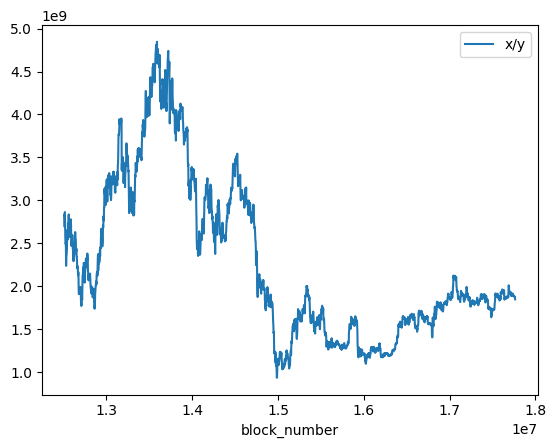

In [24]:
df.plot(x='block_number', y='x/y')

In [27]:
# calculate log differences for easier probability calcs. should have dlog(y/x) = -dlog(x/y)
df['dlog(y/x)'] = np.log(df['y/x']).diff()
df['dlog(x/y)'] = np.log(df['x/y']).diff()

In [28]:
df

,block_number,sqrt_price_x96,y/x,x/y,dlog(y/x),dlog(x/y)
0,12509859,1488666029357725662978369934166891,353026521,2832648372,NaN,NaN
1,12512259,1498758880028447235204616864140268,357815056,2794739861,0.013473,-0.013473
2,12514659,1527428496431482073729729059235451,371641284,2690766723,0.037913,-0.037913
3,12517059,1480447266659661332123963148536664,349129225,2864268953,-0.062487,0.062487
4,12519459,1510557878125983516937970465170106,363474225,2751226720,0.040266,-0.040266
...,...,...,...,...,...,...
2185,17753859,1829209344494308734880463990390144,533009569,1876138925,0.005986,-0.005986
2186,17756259,1830429610097533257794674119254826,533748609,1873541182,0.001386,-0.001386
2187,17758659,1827296619717806012513766568630551,531901969,1880045681,-0.003466,0.003466
2188,17761059,1831453713649288095012480151677960,534349456,1871434486,0.004591,-0.004591
